In [17]:
#py -m pip install torch torchvision matplotlib numpy scikit-learn

In [18]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# Setup Device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


Success! Found 2527 images.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Sample Image from dataset:


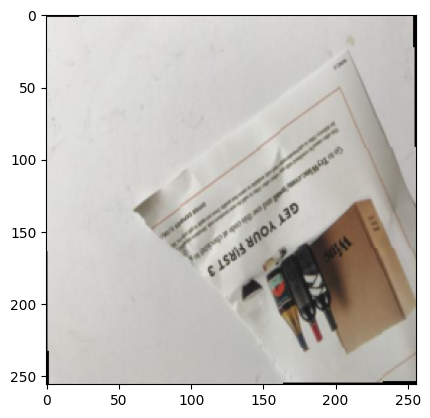

Label: paper


In [25]:
# 1. Define Transformations (Pre-processing)
transform = transforms.Compose([
    transforms.Resize((256, 256)),       # Resize all images to 256x256
    transforms.RandomHorizontalFlip(),   # Flip horizontally (Augmentation)
    transforms.RandomRotation(15),       # Rotate slightly (Augmentation)
    transforms.ToTensor(),               # Convert to Tensor numbers (0-1)
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize to [-1, 1]
])

# 2. Load the Dataset
data_path = 'dataset-resized' 

try:
    dataset = datasets.ImageFolder(root=data_path, transform=transform)
    print(f"Success! Found {len(dataset)} images.")
    print(f"Classes: {dataset.classes}")
except:
    print("ERROR: Could not find the folder. Check your path!")


# 3. Split into Train (80%) and Test (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 4. Create Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Visual Check
def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
print("Sample Image from dataset:")
imshow(images[0])
print(f"Label: {dataset.classes[labels[0]]}")